In [137]:
from random import random, randint
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

import time


class Particle:
    def __init__(self, init_cord_x_y, init_velocity_x_y, parameters, boundaries) -> None:
        self.local_best = None
        self.global_best = None
        self.velocity_x_y = init_cord_x_y
        self.cord_x_y = init_velocity_x_y
        self.W = parameters[0]
        self.C1 = parameters[1]
        self.C2 = parameters[2]
        self.boundaries = boundaries

    def move(self):
        for i, velocity in enumerate(self.velocity_x_y):
            cord = self.cord_x_y[i]
            self.velocity_x_y[i] = self._calculate_velocity(velocity, cord, self.local_best, self.global_best)
        for i, cord in enumerate(self.cord_x_y):
            velocity = self.velocity_x_y[i]
            boundary = self.boundaries[i]
            if abs(self.cord_x_y[i] + velocity) >= boundary:
                self.cord_x_y[i] = self.cord_x_y[i] - velocity
            else:
                self.cord_x_y[i] = self.cord_x_y[i] + velocity

    
    def _calculate_velocity(self, last_velocity, current_cord, local_best, global_best):
        local_impact = self.C1*random.uniform(0, 1)*(current_cord-local_best)
        global_impact = self.C2*random.uniform(0, 1)*(current_cord-global_best)
        inertia = last_velocity*self.W
        new_velocity = inertia + local_impact + global_impact
        return new_velocity
    
    def get_cords_x_y(self):
        return self.cord_x_y

    def modify_parameters(self, new_parameters):
        self.W = new_parameters[0]
        self.C1 = new_parameters[1]
        self.C2 = new_parameters[2]

    def update_if_best_local_score(self, score):
        if self.local_best is None:
            self.local_best = score
        elif score < self.local_best:
            self.local_best = score
    
    def update_global_best(self, score):
        self.global_best = score

class ParticleSwarmOptymalizer:
    def __init__(self, function) -> None:
        self.global_best = None
        self.function = function
        self.fig, self.ax = plt.subplots()
        self.first_iter = True
        self.scat = None
        self.particles = None

    def create_swarm(self, particle_number):
        particles = []
        parameters = [0.6, 0.0, 0.00]
        boundaries = [4.5, 4.5]
        for _ in range(particle_number):
            random_start_x_y_cords = [random.uniform(-4.5, 4.5), random.uniform(-4.5, 4.5)]
            random_start_velocity = [random.uniform(-1, 1), random.uniform(-1, 1)]
            particle = Particle(random_start_x_y_cords, random_start_velocity, parameters, boundaries)
            particles.append(particle)
        return particles

    def calculate_scores(self, particles, function):
        scores = []
        for particle in particles:
            cords_x_y = particle.get_cords_x_y()
            score = function(cords_x_y[0], cords_x_y[1])
            particle.update_if_best_local_score(score)
            scores.append(score)

        if self.global_best is None:
            self.global_best = min(scores)
            for particle in particles:
                particle.update_global_best(self.global_best)
        elif min(scores) < self.global_best:
            self.global_best = min(scores)
            for particle in particles:
                particle.update_global_best(self.global_best)

    def perform_optymalisation(self, particle_number, max_iter):
        particles = self.create_swarm(particle_number)
        for _ in range(max_iter):
            self.calculate_scores(particles, self.function)
            for particle in particles:
                particle.move()
            #print(self.global_best)
            self.visualise_process(particles)

    def perform_optymalisation_test(self, frame):
        if self.first_iter == True:
            self.particles = self.create_swarm(200)
            self.first_iter = False
            x = []
            y = []
            for particle in self.particles:
                x_y = particle.get_cords_x_y()
                x.append(x_y[0])
                y.append(x_y[1])
            self.scat = self.ax.scatter(x, y)
        self.calculate_scores(self.particles, self.function)
        for particle in self.particles:
            particle.move()
        x = []
        y = []
        for particle in self.particles:
            x_y = particle.get_cords_x_y()
            x.append(x_y[0])
            y.append(x_y[1])
        self.scat.set_offsets(np.c_[x, y])
        return self.scat,


    def perform_optymalisation_with_visualisation(self, max_iter):
        ani = animation.FuncAnimation(self.fig, self.perform_optymalisation_test,frames=max_iter, interval=1000, blit=True)
    
    # def visualise_process(self, particles):
        # x = []
        # y = []
        # for particle in particles:
        #     x_y = particle.get_cords_x_y()
        #     x.append(x_y[0])
        #     y.append(x_y[1])
        # plt.scatter(x, y)
        # plt.show()
        # time.sleep(2)

def function_to_optymize(x, y):
    res = pow((1.5-x-x*y), 2) + pow((2.25-x+pow(x*y, 2)), 2) + pow((2.625-x+pow(x*y, 3)), 2)
    return res


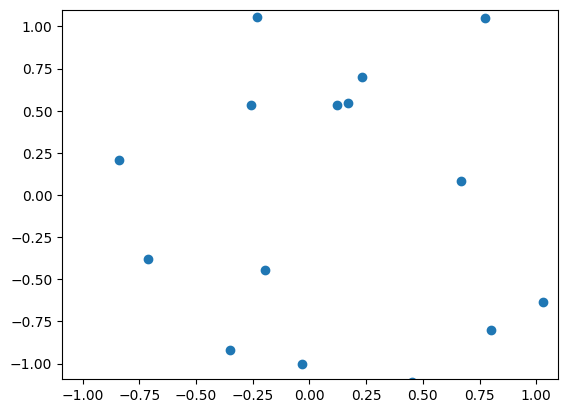

In [138]:

particle_swarm = ParticleSwarmOptymalizer(function_to_optymize)
particle_swarm.perform_optymalisation_with_visualisation(200)

    

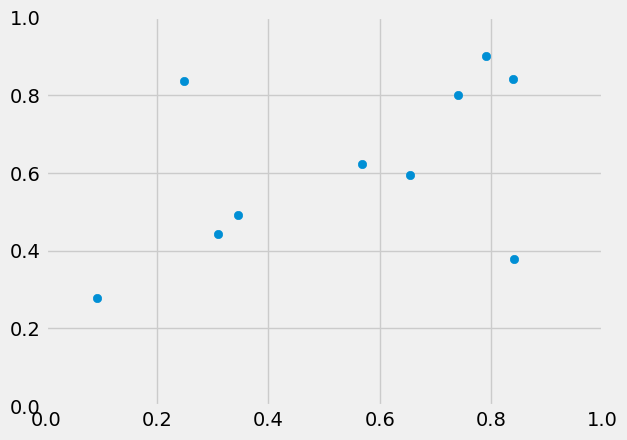

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parametry animacji
num_points = 10  # Liczba punktów
num_frames = 100  # Liczba klatek w animacji

# Generowanie początkowych współrzędnych punktów
x = np.random.rand(num_points)
y = np.random.rand(num_points)

# Funkcja aktualizująca pozycje punktów
def update(frame):
    global x, y
    x += (np.random.rand(num_points) - 0.5) * 0.1
    y += (np.random.rand(num_points) - 0.5) * 0.1

    scatter.set_offsets(np.c_[x, y])
    return scatter,

# Tworzenie figury i osi
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
scatter = ax.scatter(x, y)

# Tworzenie animacji
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=100, blit=True)

# Wyświetlanie animacji
plt.show()
